# Number of citations for popular manifold learning tools per year

In [15]:
import pylab as plt
import pandas as pd
import numpy as np
import json

# plt.style.use("mpl_style.txt")
import matplotlib.pyplot as plt
plt.style.use("opinionated_rc")
import colormaps as cmaps
import opinionated

In [16]:
df = pd.read_csv("../data/citations.csv")

df

,year,GTM,LE-NeurComp,LE-NeurIPS,Diffusion Maps,LLE,Isomap,PHATE,SNE,t-SNE,UMAP
0,2010,90,474,276,100,961,954,0,30,69,0
1,2011,107,543,245,142,1056,949,0,50,94,0
2,2012,98,586,249,161,1054,974,0,50,132,0
3,2013,91,609,290,187,1101,1012,0,68,155,0
4,2014,80,585,302,176,1114,1011,0,75,287,0
5,2015,93,626,337,233,1177,1015,0,92,567,0
6,2016,69,632,341,214,1160,955,0,104,1063,0
7,2017,60,557,360,206,1073,846,3,115,1860,0
8,2018,70,620,434,270,1089,900,15,94,3134,61
9,2019,64,611,514,300,1126,940,42,81,4573,543


In [17]:
print(np.sum(df['UMAP']))

15595


In [18]:
df['Lapl. Eig.'] = df["LE-NeurComp"]
df = df.drop(["LE-NeurComp", "LE-NeurIPS"], axis=1)
df = df.drop(["GTM"], axis=1)

df = df.rename({
    "Lapl. Eig.": "Lapl. Eig. (2003)",
    "Diffusion Maps": "Diffusion Maps (2006)",
    "Isomap": "Isomap (2000)",
    "LLE": "LLE (2000)",
    "PHATE": "PHATE (2019)",
    "SNE": "SNE (2003)",
    "t-SNE": "t-SNE (2008)",
    "UMAP": "UMAP (2018)",
}, axis=1)

df = df[[
    'year',
    "Isomap (2000)",
    "LLE (2000)",
    "Lapl. Eig. (2003)",
    "SNE (2003)",
    "Diffusion Maps (2006)",
    "t-SNE (2008)",
    "UMAP (2018)",
    "PHATE (2019)",
]]

df

,year,Isomap (2000),LLE (2000),Lapl. Eig. (2003),SNE (2003),Diffusion Maps (2006),t-SNE (2008),UMAP (2018),PHATE (2019)
0,2010,954,961,474,30,100,69,0,0
1,2011,949,1056,543,50,142,94,0,0
2,2012,974,1054,586,50,161,132,0,0
3,2013,1012,1101,609,68,187,155,0,0
4,2014,1011,1114,585,75,176,287,0,0
5,2015,1015,1177,626,92,233,567,0,0
6,2016,955,1160,632,104,214,1063,0,0
7,2017,846,1073,557,115,206,1860,0,3
8,2018,900,1089,620,94,270,3134,61,15
9,2019,940,1126,611,81,300,4573,543,42


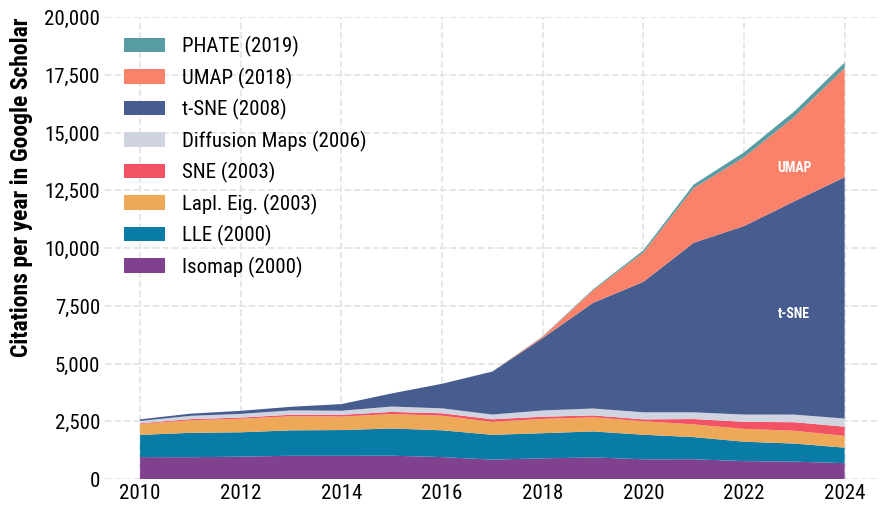

In [22]:
plt.figure(figsize=(10, 6))

with open('method_colors.json', 'r') as f:
    colors = json.load(f)


plt.stackplot(df.year, df.values[:, 1:].T,
             labels=df.columns[1:], 
             colors=[colors[col]['color'] for col in df.columns[1:]])
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc="upper left", frameon=False)
plt.ylabel("Citations per year in Google Scholar")
plt.gca().spines[['right', 'top']].set_visible(False)
plt.ylim([0, 20_000])

ticks = plt.gca().get_yticks()
plt.gca().set_yticks(ticks)
plt.gca().set_yticklabels([f'{int(x):,}' for x in ticks])

plt.text(2023, 7000, "t-SNE", color="w", ha="center", fontweight="bold")
plt.text(2023, 13300, "UMAP", color="w", ha="center", fontweight="bold")

plt.savefig("../figures/citations.png", dpi=300, facecolor="w")
plt.savefig("../figures/citations.pdf")